<a href="https://colab.research.google.com/github/juancarlosch1708-spec/IA/blob/main/CNN/Clasificaci%C3%B3n_de_ropaJC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

importa las herramientas necesarias para crear, entrenar y evaluar una red neuronal que clasifica imágenes de ropa, además de mostrar gráficas y matriz de confusión.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

está cargando el conjunto de datos Fashion-MNIST, que contiene imágenes de ropa (camisas, zapatos, bolsos, etc.) para entrenar modelos de clasificación.

In [ ]:
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

Sirve para cargar los datos del dataset Fashion-MNIST, dividiéndolos en imágenes de entrenamiento y prueba junto con sus etiquetas.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Asigna un nombre a cada número de clase del dataset Fashion-MNIST.
Es decir, si el modelo predice un 0, eso significa "T-shirt/top", si predice un 1, significa "Trouser", y así sucesivamente.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


train → para aprender,
test → para evaluar qué tan bien aprendió.

In [ ]:
index = 15000

se usa para seleccionar una imagen específica del conjunto de datos

In [ ]:
image = train_images[index]
label = train_labels[index]

Toma la imagen número index del conjunto de entrenamiento y la guarda en image,
y toma su etiqueta correspondiente y la guarda en label.

In [ ]:
print(image)

[[  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17 159 210 169 135  98 128 156 197
  102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  84 215 239 244 247 255 224 186 255 255 251
  246 220 145   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 172 252 236 225 224 224 230 240 244 242 229 224
  225 233 248 205   7   0   0   0   0   0]
 [  0   0   0   0   0  67 246 218 224 227 228 230 228 228 230 225 228 231
  229 227 221 238 208   0   0   0   0   0]
 [  0   0   0   0   0 168 246 225 229 229 228 227 230 228 226 227 230 225
  228 228 229 221 250 114   0   0   0   0]
 [  0   0   0   0   0 188 244 229 231 230 226 226 226 225 226 226 228 227
  226 228 234 228 247 161   0   0   0   0]
 [  0   0   0   0   0 220 239 233 230 226 224 224 226 226 224 225 227 227
  226 228 229 229 245 172   0   0   0   0]
 [  0   0   0   0   0 239 236 239 230 226 225 225 228 229 226 22

imprime los pixeles de la imagen

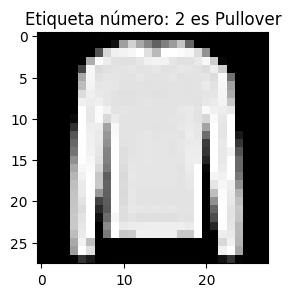

In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()

Crea una figura pequeña,
 Muestra la imagen en escala de grises,
Pone un título indicando el número de la etiqueta y su nombre real,
Y finalmente la muestra en pantalla.

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Muestra la forma (cantidad de imágenes, alto y ancho) de los conjuntos de entrenamiento y prueba.
Sirve para ver cuántas imágenes hay y su tamaño.

In [ ]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

Esto hace que los valores vayan de 0 a 1, lo cual ayuda al modelo a entrenar mejor.

In [ ]:
# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


crea el modelo

In [ ]:
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

para ver si el modelo esta aprendiendo

In [ ]:
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Configura el modelo antes de entrenarlo:

optimizer: indica cómo aprenderá el modelo (Adam ajusta los pesos).

loss: mide el error (clasificación multiclase con etiquetas numéricas).

metrics: mostrará la exactitud (qué tan bien acierta).

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.7394 - loss: 0.6998 - val_accuracy: 0.8655 - val_loss: 0.3681
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.8822 - loss: 0.3266 - val_accuracy: 0.8804 - val_loss: 0.3245
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.8969 - loss: 0.2798 - val_accuracy: 0.8949 - val_loss: 0.2917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9082 - loss: 0.2448 - val_accuracy: 0.8985 - val_loss: 0.2751
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9189 - loss: 0.2189 - val_accuracy: 0.8989 - val_loss: 0.2949
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9242 - loss: 0.2014 - val_accuracy: 0.9082 - val_loss: 0.2576
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9325 - loss: 0.1790 - val_accuracy: 0.9044 - val_loss: 0.2655
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9380 -

entrena el modelo durante 10 épocas usando las imágenes y etiquetas de entrenamiento.
Además, evalúa su rendimiento en los datos de prueba mientras entrena.

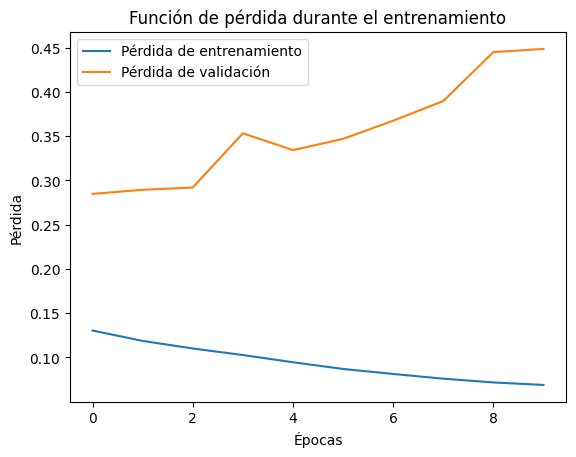

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


Dibuja una gráfica que muestra cómo disminuye el error del modelo durante el entrenamiento.

loss: error en entrenamiento

val_loss: error en datos de prueba
Esto permite ver si el modelo está aprendiendo bien o se está sobreajustando.

In [ ]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - 6ms/step - accuracy: 0.9064 - loss: 0.3038


In [ ]:
probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


Sequential([model, Softmax()])
Añade una capa Softmax al modelo para convertir las salidas en probabilidades.


predictions = probability_model.predict(test_images)
Genera predicciones para todas las imágenes de prueba.


predicted_labels = np.argmax(predictions, axis=1)
Toma la clase con mayor probabilidad como etiqueta predicha.



In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

calcula la matriz de confusion

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

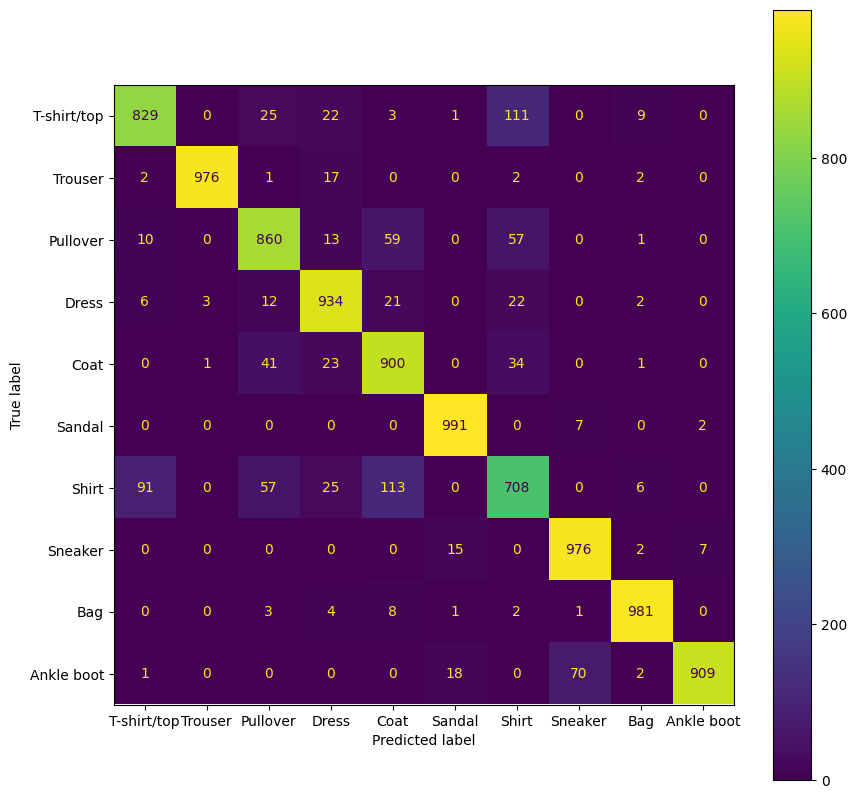

In [ ]:
# Graficar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

muestra la matriz de confusion